# Multiple Regression Linear Modelling

### Data Set : Planetary Motion Data ####
 

#### Problem Statemnt :#####
 
Researchers in a University conducted a series of experiments for predicting the orbital period of Earth and other planets. Different measures such as semi-major axis, volume, density etc.., along with the orbital period of the planets were obtained.

Problem:

Predict the orbital period of the planets from the data and check if they confirm to Kepler’s Third Law of Planetary Motion.

#### Splitting the data into Training and Testing Sets:

Taken Aspect:
- 80% Training Data

- 20% Test Data


.

### Importing  packages 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import statsmodels.formula.api as sm
import statsmodels.stats.diagnostic as sms

#   Scikit Learn --
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
#Importing a package for Using Ridge and Lasso Analysis
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale
# Splitting the Data Set into two Folds: Training and Testing using train_test_split()
from sklearn.cross_validation import train_test_split
# Tool for calculating MSE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale

#  Packages for Visualization --
import seaborn as sns
# Plotly
from plotly.offline import plot  
import plotly.plotly as py
import plotly.graph_objs as go
# Scatter Plot
from pandas.tools.plotting import scatter_matrix

In [15]:
%matplotlib inline

### Reading from CSV Files

In [16]:
data_regression = pd.read_csv('Ex01_Kepler_Regression.csv')

In [17]:
data_regression.describe()

,SemiMajorAxis,Volume,EscapeVelocity,Density,OrbitalPeriod
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,8.519732,5.293866,19.024730,3.378478,41.075821
std,10.565579,3.157912,15.921142,2.054429,68.561892
min,0.342913,0.938483,4.116927,0.606581,0.139457
25%,0.819675,1.568645,7.889534,1.347440,0.661700
50%,1.611082,6.176427,11.942805,3.606159,2.705803
75%,17.355666,7.603052,24.327655,5.349413,60.932861
max,36.673928,11.253846,68.147983,7.111330,319.583338


## Selecting the Best Model - Feature Selection

### 1. Scatter Plot 

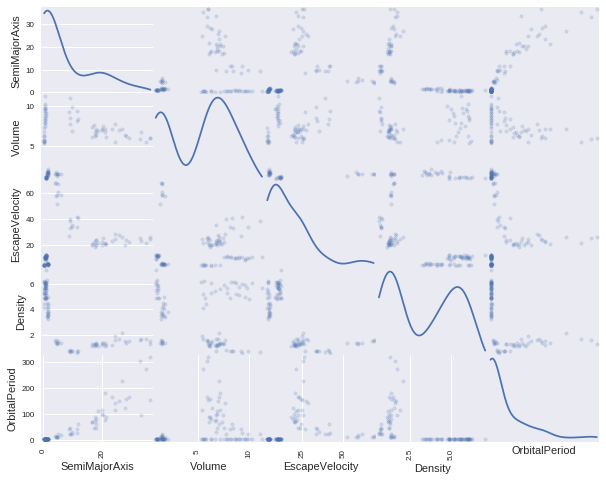

In [18]:
scatter_matrix(data_regression, alpha=0.2, figsize=(10, 8), diagonal='kde')
plt.xticks(())
plt.yticks(())

plt.show()

### 2. Correlation Matrix

In [19]:
# Computing the correlation matrix
Correlation_data = data_regression.corr()
Correlation_data

,SemiMajorAxis,Volume,EscapeVelocity,Density,OrbitalPeriod
SemiMajorAxis,1.000000,0.278926,0.323329,-0.716234,0.918149
Volume,0.278926,1.000000,-0.015625,-0.153851,0.229391
EscapeVelocity,0.323329,-0.015625,1.000000,-0.687354,0.225476
Density,-0.716234,-0.153851,-0.687354,1.000000,-0.565611
OrbitalPeriod,0.918149,0.229391,0.225476,-0.565611,1.000000


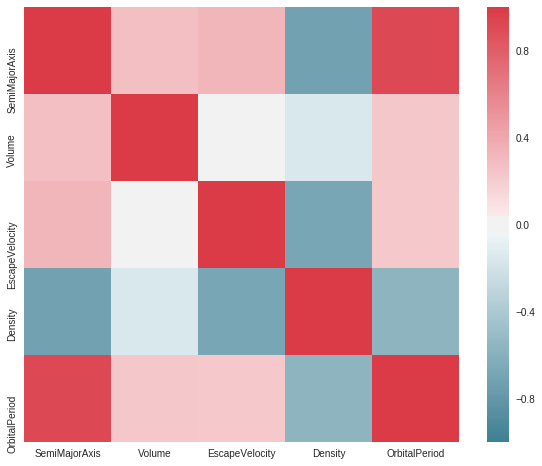

In [20]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (10, 8))

# Seaborn Heatmap
sns.heatmap(Correlation_data, mask=np.zeros_like(Correlation_data, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

## Linear Model Expression: 

#### y = B0 + B1x1 + B2x2 + B3x3 + B4x4

Age(y) = B0 + B1NO + B2Nt +B3pH + B4PetalCount

In [22]:
# init a Linear Regression Model
Linear_Model = LinearRegression()

## Cross Validation 

The one with least RMSE will be a better model as we need to decrease the RMSE

###  1).  Selecting all the features


###### Method 1 - Linear Regression Model

In [14]:
# X is 'Features' Table and Y is 'Response'
X = data_regression.drop(['Age'], axis=1)
Y = data_regression.Age

# Splitting into Testing and Training units
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=4, train_size=.80, test_size=.20)

# Computing RMSE Score :-
Score = cross_val_score(Linear_Model, X,Y, cv=10, scoring="neg_mean_squared_error")
MSE_Score = -Score
RMSE_Score = np.sqrt(MSE_Score)
RMSE_Score.mean()
print("ALL FEATURES - \n\nRMSE Score Mean = ", RMSE_Score.mean())

# Training Data into Linear Regression Model
Linear_Model.fit(X_train, Y_train)

# Intercept
print("Intercept = ", Linear_Model.intercept_)

# Coeffecients Obtained
print("Coefficeints = ", Linear_Model.coef_)

# Accuracy
Accuracy = Linear_Model.score(X_test, Y_test)
print("Accuracy = ", Accuracy)

ValueError: labels ['Age'] not contained in axis

##### Residuals

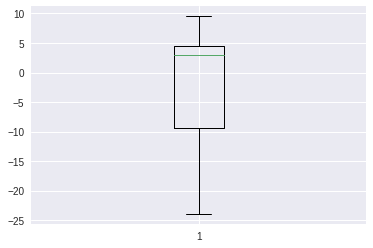

In [448]:
Residuals_allFeatures = np.array(Linear_Model.predict(X_test) - Y_test)
plt.boxplot(Residuals_allFeatures)
plt.show()

Fig 1.3: Figure shows a Box Plot with all the features of Residuals of all the features. It is slightly over predictive model.

#### Scatter Plot with Linear Regression Best Fit Lines

In [449]:
regr1 = Linear_Model
regr1.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

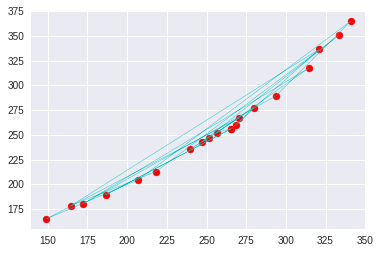

In [450]:
plt.scatter(Linear_Model.predict(X_test),Y_test, color='r')
plt.plot(Linear_Model.predict(X_test),Y_test, color='c',linewidth=0.4)
plt.show()

###### Method 2 - OLS Method

In [451]:
#model_new = sm.OLS()

In [452]:
model_ALL = sm.ols(formula="Age ~ N0 + Nt + pH + PetalCount", data = data_regression[:80]).fit()
model_ALL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     486.2
Date:                Fri, 31 Mar 2017   Prob (F-statistic):           8.60e-53
Time:                        18:11:59   Log-Likelihood:                -295.87
No. Observations:                  80   AIC:                             601.7
Df Residuals:                      75   BIC:                             613.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    355.1804    183.537      1.935      0.057     -10.444     720.805
N0             3.5748     11.348      0.315      0.754     -19.031      26.180
Nt           -49.4394      1.127    -43.874      0.000     -51.684     -47.195
pH            -2.8994     11.157     -0.260      0.796     -25.125      19.326
PetalCount     5.0901      2.363      2.154      0.034       0.383       9.797
==============================================================================
Omnibus:                       64.290   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              367.861
Skew:                           2.474   Prob(JB):                     1.32e-80
Kurtosis:                      12.267   Cond. No.                     2.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [453]:
#t value is close to 0 then it is insignificant...

#if t is far, then there is a good chance it is significant

In [454]:
#Null hypothesis - to be checked in COI [0.025 - 0.975] 95%, if the value includes 0, it is insignific, while Nt is quite far from 0, implies it is significant, AIC - model complexity, F is higher, next model to be taken into account,  

### 2).  Selecting 'Nt' and 'PetalCount' features

###### Method 1 - Linear Regression Model

In [455]:
# X is 'Features' Table and Y is 'Response'x
X_With_Nt_PC = data_regression.drop(['N0','pH','Age'], axis=1)

# Splitting into Testing and Training units
X_train, X_test, Y_train, Y_test = train_test_split(X_With_Nt_PC, Y, random_state=4, train_size=.80, test_size=.20)

# Computing RMSE Score :-
Score = cross_val_score(Linear_Model, X_With_Nt_PC, Y, cv=10, scoring="neg_mean_squared_error")
MSE_Score = -Score
RMSE_Score = np.sqrt(MSE_Score)
print("SELECTED FEATURES (Nt and PC) - \n\nRMSE Score Mean = ", RMSE_Score.mean())

# Training Data into the model
Linear_Model.fit(X_train, Y_train)

# Intercept
print("Intercept = ", Linear_Model.intercept_)

# Coeffecients Obtained
print("Coefficeints = ", Linear_Model.coef_)

# Accuracy
Accuracy = Linear_Model.score(X_test, Y_test)
print("Accuracy = ", Accuracy)

SELECTED FEATURES (Nt and PC) - 

RMSE Score Mean =  9.50512568546
Intercept =  393.465476353
Coefficeints =  [-49.78026122   4.89246872]
Accuracy =  0.967391846037


##### Residuals

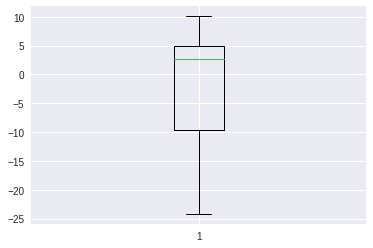

In [456]:
Residuals_NTandPC = np.array(Linear_Model.predict(X_test) - Y_test)
plt.boxplot(Residuals_NTandPC)
plt.show()

Fig 1.4: Figure shows a Box Plot with features of Residuals of Nt and PetalCount. It is slightly over predictive model.

#### Scatter Plot with Linear Regression Best Fit Lines

In [457]:
regr2 = Linear_Model
regr2.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

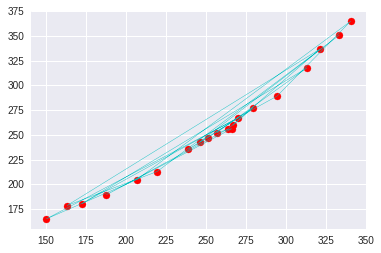

In [458]:
plt.scatter(Linear_Model.predict(X_test),Y_test, color='r')
plt.plot(Linear_Model.predict(X_test),Y_test, color='c',linewidth=0.4)
plt.show()

###### Method 2 - OLS Method

In [459]:
model_NTandPC = sm.ols(formula="Age ~ Nt + PetalCount", data = data_regression[:80]).fit()
model_NTandPC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     996.0
Date:                Fri, 31 Mar 2017   Prob (F-statistic):           9.38e-56
Time:                        18:12:00   Log-Likelihood:                -295.96
No. Observations:                  80   AIC:                             597.9
Df Residuals:                      77   BIC:                             605.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    391.8189     11.118     35.242      0.000     369.680     413.957
Nt           -49.4160      1.107    -44.628      0.000     -51.621     -47.211
PetalCount     5.1336      2.277      2.255      0.027       0.600       9.668
==============================================================================
Omnibus:                       63.309   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.926
Skew:                           2.443   Prob(JB):                     1.03e-76
Kurtosis:                      12.006   Cond. No.                         60.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3).  Selecting only 'Nt' Feature

###### Method 1 - Linear Regression Model

In [460]:
# X is 'Features' Table and Y is 'Response'
X_With_Nt_Only = data_regression.drop(['N0','pH','PetalCount','Age'], axis=1)

# Splitting into Testing and Training units
X_train, X_test, Y_train, Y_test = train_test_split(X_With_Nt_Only, Y, random_state=4, train_size=.80, test_size=.20)

# Computing RMSE Score :-
Score = cross_val_score(Linear_Model, X_With_Nt_Only, Y, cv=10, scoring="neg_mean_squared_error")
MSE_Score = -Score
RMSE_Score = np.sqrt(MSE_Score)
print("SELECTED FEATURES (Nt Only) - \n\nRMSE Score Mean = ", RMSE_Score.mean())

# Training Data into the model
Linear_Model.fit(X_train, Y_train)

# Intercept
print("Intercept = ", Linear_Model.intercept_)

# Coeffecients Obtained
print("Coefficeints = ", Linear_Model.coef_)

# Accuracy
Accuracy = Linear_Model.score(X_test, Y_test)
print("Accuracy = ", Accuracy)

SELECTED FEATURES (Nt Only) - 

RMSE Score Mean =  9.61600017706
Intercept =  416.095208129
Coefficeints =  [-49.83337922]
Accuracy =  0.964480217103


##### Residuals

In [461]:
# Residuals vs y, yhat, in table form

In [462]:
#Scatter plot along with regression best fit line, to check if we are moving in the right dir

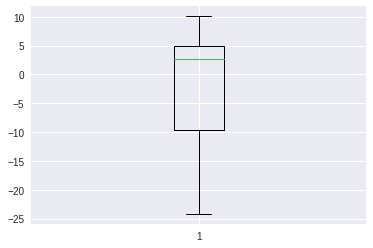

In [463]:
Residuals_NTOnly = np.array(Linear_Model.predict(X_test) - Y_test)
plt.boxplot(Residuals_NTandPC)
plt.show()

Fig 1.5: Figure shows a Box Plot with features of Residuals of only Nt. It is comparitively a under predictive model

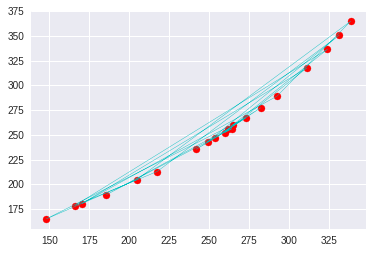

In [464]:
regr3 = Linear_Model
regr3.fit(X_train, Y_train)

plt.scatter(Linear_Model.predict(X_test),Y_test, color='r')
plt.plot(Linear_Model.predict(X_test),Y_test, color='c',linewidth=0.4)
plt.show()

###### Method 2 - OLS Method

In [465]:
model_NT = sm.ols(formula="Age ~ Nt", data = data_regression[:80]).fit()
model_NT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     1888.
Date:                Fri, 31 Mar 2017   Prob (F-statistic):           2.01e-56
Time:                        18:12:01   Log-Likelihood:                -298.52
No. Observations:                  80   AIC:                             601.0
Df Residuals:                      78   BIC:                             605.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    415.1164      4.209     98.637      0.000     406.738     423.495
Nt           -49.3272      1.135    -43.453      0.000     -51.587     -47.067
==============================================================================
Omnibus:                       65.648   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.740
Skew:                           2.533   Prob(JB):                     2.85e-84
Kurtosis:                      12.474   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since this data shows the least error so we can move forward with this data and take the log of Nt and find the OLS Summary again of this method. 

Following Steps will be performed ahead:

- Taking the log of Nt

- Determining OLS Summary again

- Calculating Residuals and plot a Box plot

##### Step 2:  Taking the log of 'Nt' Feature

In [466]:
model_logNT = sm.ols(formula= "Age ~ np.log(Nt)", data = data_regression[:80]).fit()
model_logNT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.732e+05
Date:                Fri, 31 Mar 2017   Prob (F-statistic):          2.70e-132
Time:                        18:12:01   Log-Likelihood:                -119.35
No. Observations:                  80   AIC:                             242.7
Df Residuals:                      78   BIC:                             247.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    434.7923      0.486    895.331      0.000     433.825     435.759
np.log(Nt)  -159.6054      0.383   -416.227      0.000    -160.369    -158.842
==============================================================================
Omnibus:                        1.331   Durbin-Watson:                   2.223
Prob(Omnibus):                  0.514   Jarque-Bera (JB):                1.124
Skew:                          -0.290   Prob(JB):                        0.570
Kurtosis:                       2.959   Cond. No.                         8.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Step 3:  Predicting the model using test data

In [467]:
Predict_logNT = model_logNT.predict(X_test)

##### Step 4:  Plotting  Actual Age vs Predicted Age. Ideal case would be a straight line having y = x equation

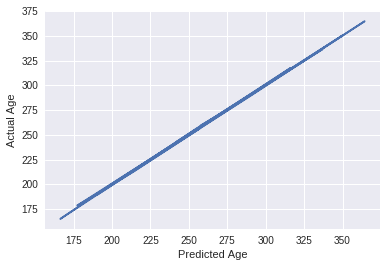

In [468]:
plt.plot(Predict_logNT, Y_test)
plt.xlabel("Predicted Age")
plt.ylabel("Actual Age")
plt.show()

Fig 1.6: Figure shows a line graph with only Nt features selected only. This graph shows a linear relationship of a line having an equation of y = x, which is a balanced model.

##### Step 5: Residuals - Box plot

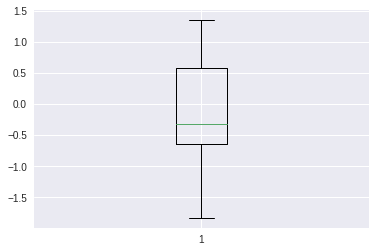

In [469]:
Residuals_NTOnly = np.array(Predict_logNT - Y_test)
plt.boxplot(Residuals_NTOnly)
plt.show()

Fig 1.7: Figure shows a Box Plot with features of Residuals of only Nt. It is a balanced model

##### Step 6: Residuals - Histogram

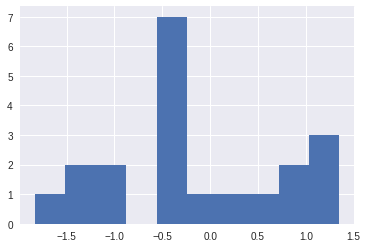

In [470]:
plt.hist(Residuals_NTOnly, bins=10)
plt.show()

### T - stats and P-Value

In [471]:
name = ['F statistics', 'p_value']
test = sms.het_goldfeldquandt(model_logNT.resid, model_logNT.model.exog)
list(zip(name,test))

[('F statistics', 0.9504296386248865), ('p_value', 0.56185231186142848)]

.



## Ridge Regression 

Residual Sum of Squares(RSS) = Sum(y - y(hat))^2  => What % of variation in x is not described 

Objective = RSS + a(Sum(B^2))

##### Generating Random alpha Values

In [472]:
# Alpha Values 
alphas = 10**np.linspace(10,-2,100)*0.5

##### X and Y

In [473]:
# X contains all features

In [474]:
# Y contains Target

###  Ridge Regression 1 - 

##### --- Using Random alpha Values

In [475]:
# Applying Ridge Model Fit with no specific value of alpha
ridge = Ridge(normalize=True)

coefs = [] 

# Fitting X and Y for each value of alpha using a loop statment
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)

##### Forming a DataFrame

In [476]:
# Forming a Data Frame of Coefficients(B0(N0), B1(Nt), B2(pH), B3(PC)), also involving alpha Values
coefs_df = pd.DataFrame(coefs, columns=X.columns.values) 
coefs_df['Alpha'] = pd.DataFrame(alphas)

coefs_df.head()

,N0,Nt,pH,PetalCount,Alpha
0,-6.022439e-09,-1.000878e-08,7.931866e-10,1.108602e-09,5.000000e+09
1,-7.961310e-09,-1.323101e-08,1.048546e-09,1.465506e-09,3.782317e+09
2,-1.052438e-08,-1.749062e-08,1.386116e-09,1.937313e-09,2.861184e+09
3,-1.391262e-08,-2.312157e-08,1.832364e-09,2.561014e-09,2.164381e+09
4,-1.839166e-08,-3.056536e-08,2.422277e-09,3.385509e-09,1.637275e+09


##### Plot for Ridge Regression

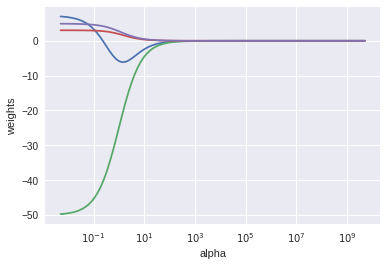

In [477]:
# Plotting Graphs -
ax = plt.gca()  # to get the instance of plot
ax.plot(alphas, coefs)
ax.set_xscale('log')   # need on log scale because of huge variation in alpha
plt.axis('tight')      # Just holds the position of 
plt.xlabel('alpha')
plt.ylabel('weights')


### Using Cross - Validation Package for further Ridge Regression

In [478]:
# Using the Cross-Validation Package to split data into Training and Testing Sets
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.5, random_state=1)

###  Ridge Regression 2 - 

##### --- Using specific alpha Value - randomly chosen

In [479]:
# Fitting into Ridge Model using specific value of alpha = 10
ridge2 = Ridge(alpha=10, normalize=True)
ridge2.fit(X_train, Y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [480]:
# Getting Predictions for Ridge(Test) as compared with the Ridge(Training)
pred2 = ridge2.predict(X_test)

print(pd.Series(ridge2.coef_, index=X.columns))
print(mean_squared_error(Y_test, pred2))

N0           -2.006325
Nt           -4.491225
pH            3.405050
PetalCount    0.978187
dtype: float64
1747.28367063


###  Ridge Regression 3 - 

##### --- Finding the perfect alpha Value for an ideal Ridge Model

In [481]:
# Fiting the data in a Cross_Val Ridge Model to get the perfect alpha value for a ideal model
ridge_cv = RidgeCV(alphas=alphas, scoring='mean_squared_error', normalize=True)
ridge_cv.fit(X_train, Y_train)
# Deducted perfect value of alpha for best ridge model
ridge_cv.alpha_

/home/user/StackRoute/Linear_Regression_Model/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/StackRoute/Linear_Regression_Model/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/StackRoute/Linear_Regression_Model/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/StackRoute/Linear_Regression_Model/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/StackRoute/Linear

0.0050000000000000001

In [482]:
ridge3 = Ridge(alpha=ridge_cv.alpha_, normalize=True)
ridge3.fit(X_train, Y_train)

Ridge(alpha=0.0050000000000000001, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=True, random_state=None, solver='auto',
   tol=0.001)

In [483]:
pred3 = ridge3.predict(X_test)

print(pd.Series(ridge3.coef_, index=X.columns))
print(mean_squared_error(Y_test, pred3))


N0             1.949761
Nt           -49.070932
pH             4.651837
PetalCount     5.040667
dtype: float64
70.7055845853


### Plotly

In [484]:
# Traces
trace0 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.N0,
    name = 'B0 (N0)',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.Nt,
    name = 'B1 (Nt)',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.pH,
    name = 'B2 (pH)',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.PetalCount,
    name = 'B3 (PetalCount)',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)

In [485]:
data1 = [trace0, trace1, trace2, trace3]

layout = dict(title = 'Alpha vs weights',
              xaxis = dict(title = 'Alpha'),
              yaxis = dict(title = 'Weights'),
              )
fig = dict(data=traces, layout=layout)
plot(fig)

'file:///home/user/StackRoute/Linear_Regression_Model/temp-plot.html'

### Lasso Regression

74.321996373710334

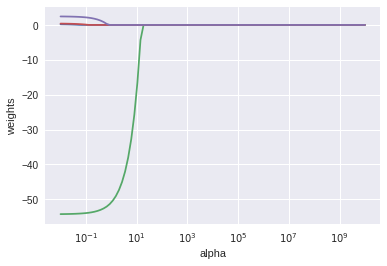

In [486]:
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []


for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), Y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')    

lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, Y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, Y_train)
mean_squared_error(Y_test, lasso.predict(X_test))

#### Plotly

In [487]:
# Traces
trace0 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.N0,
    name = 'B0 (N0)',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.Nt,
    name = 'B1 (Nt)',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.pH,
    name = 'B2 (pH)',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.PetalCount,
    name = 'B3 (PetalCount)',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)

In [488]:
data1 = [trace0, trace1, trace2, trace3]

layout = dict(title = 'Alpha vs weights',
              xaxis = dict(title = 'Alpha'),
              yaxis = dict(title = 'Weights'),
              )
fig = dict(data=traces, layout=layout)
plot(fig)

'file:///home/user/StackRoute/Linear_Regression_Model/temp-plot.html'

# Conclusion

This clearly shows that on using all the features we get a RMSE Score of 9.69, while on using Nt and PetalCount Features, the RMSE Score decreases to 9.51, and on futher droping the PetalCount and using only one feature, Nt, the RMSE Score increases again to 9.62, so as a conclusion, we can select 'Nt' and 'PetalCount' OR only 'Nt' feature as the required features for this analysis.

On further analysis, using the OLS Method, the one with only 'Nt' feature selected shows the least error and so that case is taken for further examination. 

Predicting the values using log of Nt gives accurate results, and also a line with approx y = x equation. 

Box plot for each and every case also shows that Nt feature selection gives us the most balanced model, while others tend to produce a over-predictive models.

So Feature Selected is Nt.

Age of wood can be predicted using this feature and has been shown above.